<a href="https://colab.research.google.com/github/uscudum/ML-AS-Linear-Regression-HousingData/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la regresión lineal



## Importanción de datos

In [2]:
import pandas as pd

df = pd.read_csv('HousingData.csv')
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por eso empezaremos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.


```
import seaborn as sns
import matplotlib.pyplot as plt
```



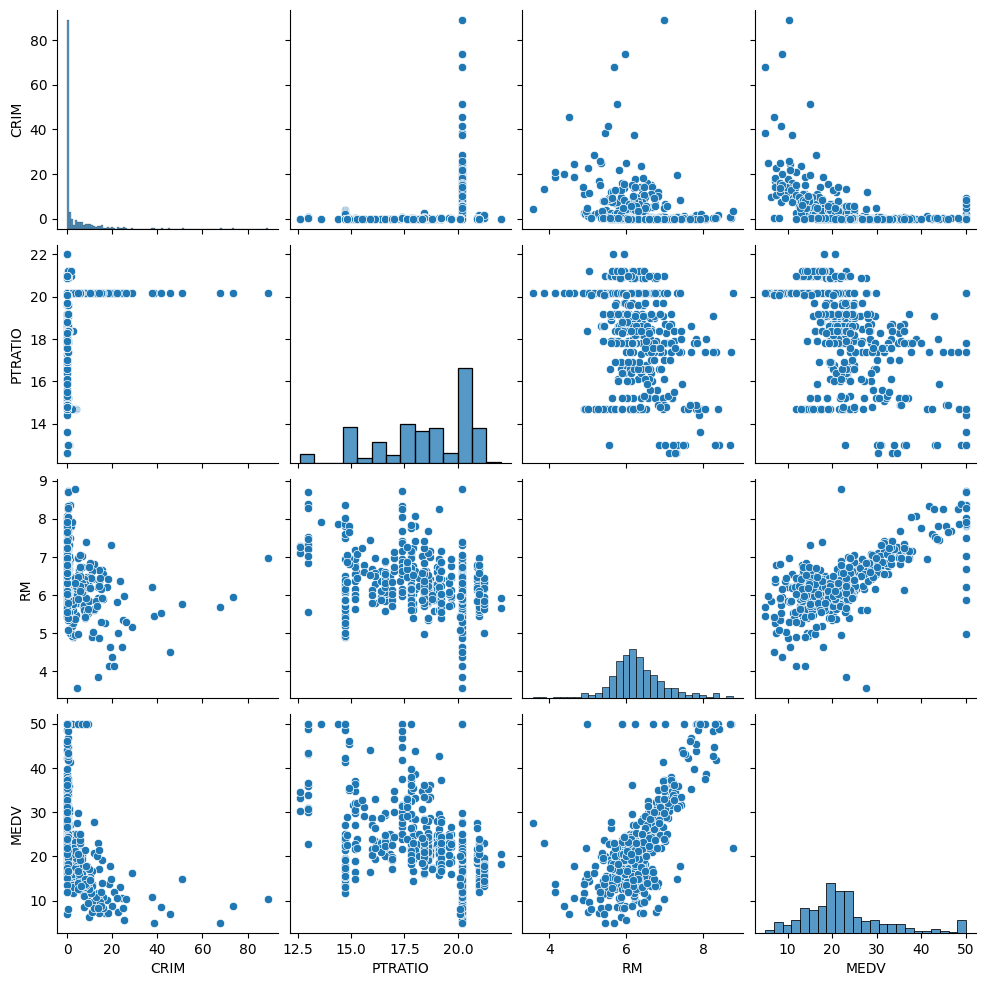

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['CRIM', 'PTRATIO', 'RM', 'MEDV']
sns.pairplot(df[cols])
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones.
usando **[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)** de ***Seaborn***.

<Axes: >

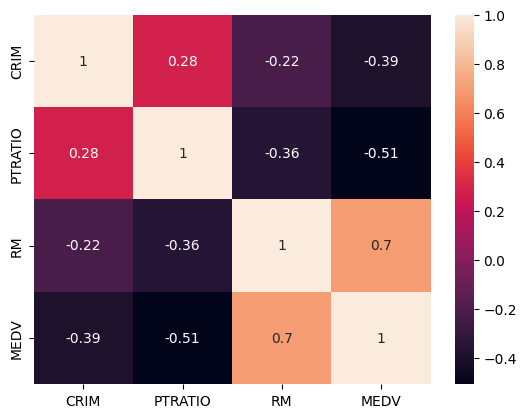

In [4]:
sns.heatmap(df[cols].corr(), annot=True)

## Creando el modelo con scikit-learn



```
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
```

En X e Y almacenamos los datos que vamos a trabajar (los values de las columnas df['']).

Luego creamos dos variables más para almanear la función StandardScaler()

Para así poder utilizar el fit_transform() en X y en Y para estandarizarlos

Utilizaremos el [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de **skaleran**

Ajustando el modelo con la función **fit**, pasando los argumentos x e y estandarizados



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Separamos las variables dependientes e independientes
X = df['RM'].values.reshape(-1, 1)
Y = df['MEDV'].values.reshape(-1, 1)

# Estandarizamos los valores
ss_x = StandardScaler()
ss_y = StandardScaler()
X_std = ss_x.fit_transform(X)
Y_std = ss_y.fit_transform(Y)

# Creamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_std, Y_std)

LinearRegression()

## Generando predicción con el modelo

Utilizamos el método predict


```
lr.predict('argumento estandarizado')
```
Para estandarizar el argumento debemos transformarlo (.transform()) convirtiendo el argumento en un array transformado en 2D np.array(['']).reshape(-1,1)


In [9]:
import numpy as np

# Ingresamos una entrada de ejemplo y la estandarizamos
num_hab = 11
num_hab_std = ss_x.transform(np.array([num_hab]).reshape(-1,1))

# Predecimos el resultado y lo des-estandarizamos
result_std = lr.predict(num_hab_std)
result = ss_y.inverse_transform(result_std)[0][0]

valor_promedio = round(result * 1000,2)

print("Una casa con ", num_hab, " habitaciones, vale aprox: USD", valor_promedio)


Una casa con  11  habitaciones, vale aprox: USD 65452.58
